In [1]:
# Veri işleme ve görselleştirme için gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model eğitimi ve performans değerlendirme araçları
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve
)


In [2]:
# Veri setini yükle
df = pd.read_csv("dataset_phishing.csv")

# Geçerli etiketlere sahip olmayan satırları çıkar
df = df[df['status'].isin(['legitimate', 'phishing'])]

# Etiketleri sayısallaştır: legitimate → 0, phishing → 1
df['status'] = df['status'].map({'legitimate': 0, 'phishing': 1})

# İlk 5 satırı göster
df.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [3]:
# Model girdi (X) ve hedef (y) ayrımı
X = df.drop(['status', 'url'], axis=1)  # URL metni analiz dışı bırakılıyor
y = df['status']

# Veriyi eğitim ve test olarak ayır (sınıf dengesi için stratify önemli)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
# Random Forest sınıflandırıcısı oluşturuluyor
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    min_samples_split=10,
    max_features='sqrt',
    random_state=42
)

# Model eğitiliyor
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapılır
y_pred = model.predict(X_test)


Accuracy: 0.9566929133858267

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1143
           1       0.95      0.96      0.96      1143

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



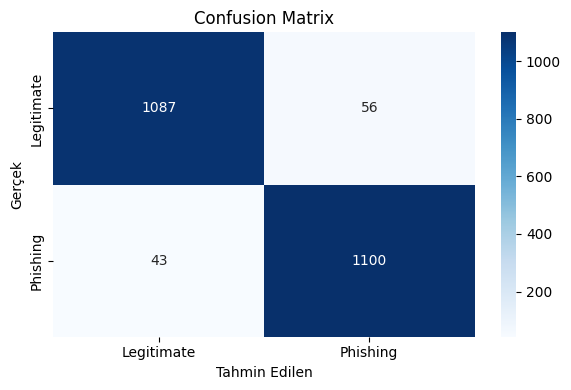

In [5]:
# Doğruluk ve sınıflandırma metrikleri
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Legitimate", "Phishing"],
            yticklabels=["Legitimate", "Phishing"])
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()


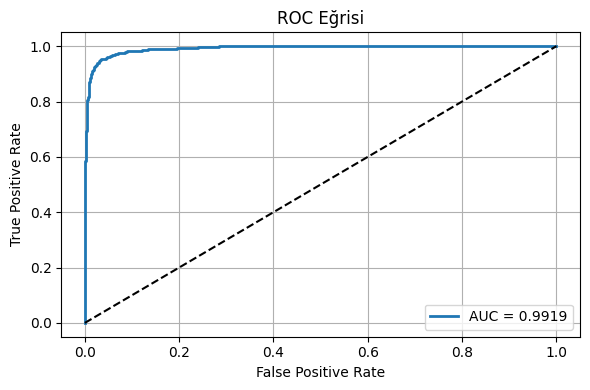

In [6]:
# Pozitif sınıf için olasılık değerleri
y_probs = model.predict_proba(X_test)[:, 1]

# ROC eğrisi hesaplama
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# ROC eğrisi çizimi
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


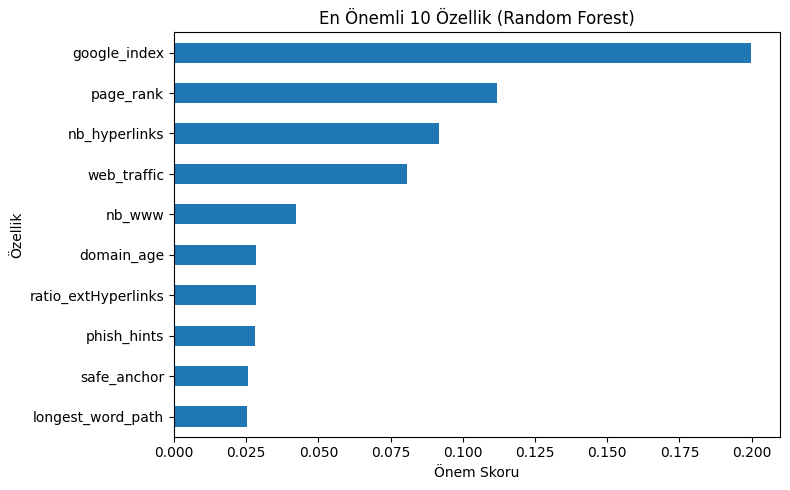

In [7]:
# En önemli özellikleri göster
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
top_features = feat_imp.nlargest(10)

plt.figure(figsize=(8, 5))
top_features.plot(kind='barh')
plt.title("En Önemli 10 Özellik (Random Forest)")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellik")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [8]:
print("Toplam örnek sayısı:", df.shape[0])
print("Özellik (feature) sayısı:", df.shape[1] - 2)  # 'status' ve 'url' hariç


Toplam örnek sayısı: 11430
Özellik (feature) sayısı: 87
